In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [2]:
normal_data=pd.read_csv("../Normal_data.csv")
metasploti_data=pd.read_csv("../metasploitable-2.csv")
ovs_data=pd.read_csv("../OVS.csv")

In [3]:
frames=[normal_data,metasploti_data,ovs_data]
data=pd.concat(frames,ignore_index=True)

In [4]:
data.Label = data.Label.str.replace(' ', '')
print(data.Label.unique())

['Normal' 'U2R' 'BFA' 'DDoS' 'DoS' 'Probe' 'Web-Attack' 'BOTNET']


In [5]:
data=data.loc[:, (data != 0).any(axis=0)]

In [6]:
data3 = data.loc[:, data.columns.difference(['Flow ID', 'Src IP','Dst IP','Timestamp','Src Port','Dst Port','Protocol'])]
data3=data3.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
data3.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0,0.0,0.0,0.0,0.0,0,12.0,12.0,12.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,64,3369.0,3369.0,3369.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0,13.0,13.0,13.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
3,1,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.00000,...,0,0,1,248,2,1,2,0.0,248.0,0
4,0,0.0,0.0,0.0,0.0,144,167136.0,115976.2,2573.0,72264.35192,...,1,3510,6,370,7,6,7,3510.0,370.0,0


In [7]:
data3.Label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
data3.Label.replace("Saldiri","1",inplace=True)
data3.Label.replace("Normal","0",inplace=True)
data3.Label.unique()

array(['1', '0'], dtype=object)

In [8]:
b=data3.columns
for i in b:
    print(i)

ACK Flag Cnt
Active Max
Active Mean
Active Min
Active Std
Bwd Header Len
Bwd IAT Max
Bwd IAT Mean
Bwd IAT Min
Bwd IAT Std
Bwd IAT Tot
Bwd PSH Flags
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Bwd URG Flags
Down/Up Ratio
FIN Flag Cnt
Flow Byts/s
Flow Duration
Flow IAT Max
Flow IAT Mean
Flow IAT Min
Flow IAT Std
Flow Pkts/s
Fwd Act Data Pkts
Fwd Header Len
Fwd IAT Max
Fwd IAT Mean
Fwd IAT Min
Fwd IAT Std
Fwd IAT Tot
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkt Len Std
Fwd Pkts/s
Fwd Seg Size Avg
Idle Max
Idle Mean
Idle Min
Idle Std
Init Bwd Win Byts
Init Fwd Win Byts
Label
PSH Flag Cnt
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
RST Flag Cnt
SYN Flag Cnt
Subflow Bwd Byts
Subflow Bwd Pkts
Subflow Fwd Byts
Subflow Fwd Pkts
Tot Bwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
TotLen Fwd Pkts
URG Flag Cnt


In [9]:
X=data3[["Active Max"
,"Active Mean"
,"Active Min"
,"Bwd IAT Max"
,"Bwd IAT Tot"
,"Bwd PSH Flags"
,"Bwd Pkt Len Max"
,"Bwd Pkt Len Mean"
,"Bwd Pkts/s"
,"Bwd Seg Size Avg"
,"Bwd URG Flags"
,"Flow Duration"
,"Flow IAT Max"
,"Flow IAT Mean"
,"Flow Pkts/s"
,"Fwd Header Len"
,"Fwd IAT Max"
,"Fwd IAT Mean"
,"Fwd IAT Tot"
,"Fwd Pkt Len Max"
,"Fwd Pkt Len Mean"
,"Fwd Seg Size Avg"
,"Idle Max"
,"Idle Mean"
,"Idle Min"
,"PSH Flag Cnt"
,"Pkt Len Max"
,"Pkt Len Mean"
,"Pkt Len Std"
,"Pkt Len Var"
,"Pkt Size Avg"
,"Subflow Bwd Byts"
,"Subflow Bwd Pkts"
,"Subflow Fwd Byts"
,"Subflow Fwd Pkts"
,"Tot Bwd Pkts"
,"Tot Fwd Pkts"
,"TotLen Bwd Pkts"
,"TotLen Fwd Pkts"
,"URG Flag Cnt"]]
y=data3.Label
print(X.shape)
print(y.shape)

(343889, 40)
(343889,)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.08817253, -0.07895971, -0.05974394, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [-0.08817253, -0.07895971, -0.05974394, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [-0.08817253, -0.07895971, -0.05974394, ..., -0.02986745,
        -0.00860033, -0.10935765],
       ...,
       [-0.08817253, -0.07895971, -0.05974394, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [-0.08709042, -0.07730406, -0.05781588, ..., -0.02974927,
        -0.00829775, -0.10935765],
       [-0.08817253, -0.07895971, -0.05974394, ..., -0.02986745,
        -0.00860033, -0.10935765]])

In [11]:
y= pd.get_dummies(y, drop_first=True)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


C:\Users\Birol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Birol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592081234806277

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     17237
           1       0.96      1.00      0.98     68736

    accuracy                           0.96     85973
   macro avg       0.97      0.91      0.93     85973
weighted avg       0.96      0.96      0.96     85973



In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
model = XGBRegressor(n_estimators=1000,learning_rate=0.5,n_jobs=4)
model.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_test, y_test)],
             verbose=False)

pred=model.predict(X_test)
print("----- XGBoost ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- XGBoost ------")

C:\Users\Birol\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


----- XGBoost ------
0.9672844168655265
0.011247478
----- XGBoost ------


In [15]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17237
           1       0.99      1.00      1.00     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.99      0.99     85973
weighted avg       0.99      0.99      0.99     85973



In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model=RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- Random Forest ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- Random Forest ------")

<ipython-input-17-3a1a16790e4c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


----- Random Forest ------
0.9658516762428014
0.009641674129049056
----- Random Forest ------


In [18]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17237
           1       0.99      1.00      1.00     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.99      0.99     85973
weighted avg       0.99      0.99      0.99     85973



In [19]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- DecisionTreeRegressor ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- DecisionTreeRegressor ------")

----- DecisionTreeRegressor ------
0.9649553277135283
0.009341995166414967
----- DecisionTreeRegressor ------


In [20]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17237
           1       0.99      1.00      0.99     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.99      0.99     85973
weighted avg       0.99      0.99      0.99     85973



In [21]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- KNN ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- KNN ------")

C:\Users\Birol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


----- KNN ------
0.9909855419724797
0.8539774115129168
----- KNN ------


In [22]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     17237
           1       0.99      1.00      0.99     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.98      0.99     85973
weighted avg       0.99      0.99      0.99     85973



In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))

C:\Users\Birol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9868330755004479
0.8935828690402801


In [24]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17237
           1       0.99      1.00      0.99     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.97      0.98     85973
weighted avg       0.99      0.99      0.99     85973



In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)


print ("Model predict")
y_pred = model.predict(X_test)
print ("Model predict")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("----- GaussianNB ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- GaussianNB ------")

C:\Users\Birol\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


----- GaussianNB ------
0.7940865155339467
16.06226373396299
----- GaussianNB ------


In [26]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.48      0.28      0.36     17237
           1       0.84      0.92      0.88     68736

    accuracy                           0.79     85973
   macro avg       0.66      0.60      0.62     85973
weighted avg       0.76      0.79      0.77     85973



from sklearn.svm import SVC
model = SVC(C=1.0, random_state=1, kernel='linear')
model.fit(X_train,y_train)
print("----- SVC ------")
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,pred))
print("----- SVC ------")

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, SimpleRNN, LSTM,Masking,Bidirectional
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import model_from_json,model_from_yaml,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from keras import metrics, regularizers
from keras.optimizers import RMSprop,Adam
from keras import backend as K

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(257916, 40)
(85973, 40)
(257916, 1)
(85973, 1)


In [34]:
# Model için gerekli değerler
#epochs_sayisi=5
batch_size=512
# Çıktı gözükmemesi için
verbose=1
validation_split=0.1
max_len=len(X.columns)
vocab_size=10000

In [35]:
def rnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(SimpleRNN(40,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(24,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    print ("Model evaluate")
    score = model.evaluate(X_test, y_test, verbose = 0) 
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])
    print ("Model evaluate")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return history,model

In [36]:
def lstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    print ("Model evaluate")
    score = model.evaluate(X_test, y_test, verbose = 0) 
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])
    print ("Model evaluate")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return history,model

In [37]:
def bilstm(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(Bidirectional(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01))))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    print ("Model evaluate")
    score = model.evaluate(X_test, y_test, verbose = 0) 
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])
    print ("Model evaluate")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return history,model

In [38]:
def cnn(epoch_sayisi):
    model=Sequential()
    model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
    model.add(Conv1D(32,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(16,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(4,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                      verbose=verbose,validation_split=validation_split)
    print ("Model evaluate")
    score = model.evaluate(X_test, y_test, verbose = 0) 
    print('Test loss:', score[0]) 
    print('Test accuracy:', score[1])
    print ("Model evaluate")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return history,model
    #model.summary()


    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    


 ************ Start cnn ********** 
Epoch 1/2


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


454/454 [==============================] - 12s 25ms/step - loss: 0.6164 - acc: 0.7999 - val_loss: 0.4985 - val_acc: 0.8020
Epoch 2/2
454/454 [==============================] - 10s 23ms/step - loss: 0.4995 - acc: 0.8009 - val_loss: 0.4977 - val_acc: 0.8020
Model evaluate
Test loss: 0.5010901689529419
Test accuracy: 0.7995068430900574
Model evaluate


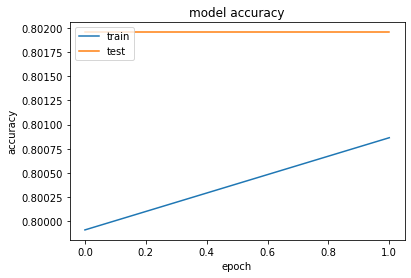



 ************ END cnn ********** 


 ************ Start rnn ********** 
Epoch 1/2


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


454/454 [==============================] - 44s 91ms/step - loss: 0.7441 - acc: 0.8329 - val_loss: 0.4565 - val_acc: 0.8440
Epoch 2/2
454/454 [==============================] - 42s 94ms/step - loss: 0.4402 - acc: 0.8433 - val_loss: 0.4233 - val_acc: 0.8447
Model evaluate
Test loss: 0.42355877161026
Test accuracy: 0.8447070717811584
Model evaluate


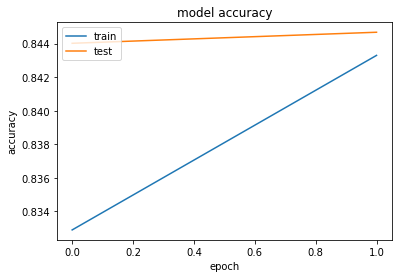



 ************ END rnn ********** 


 ************ Start lstm ********** 
Epoch 1/2


C:\Users\Birol\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


454/454 [==============================] - 57s 119ms/step - loss: 0.6416 - acc: 0.8231 - val_loss: 0.4513 - val_acc: 0.8348
Epoch 2/2
454/454 [==============================] - 52s 116ms/step - loss: 0.6479 - acc: 0.8340 - val_loss: 0.4288 - val_acc: 0.8429
Model evaluate
Test loss: 0.4282127916812897
Test accuracy: 0.8429855704307556
Model evaluate


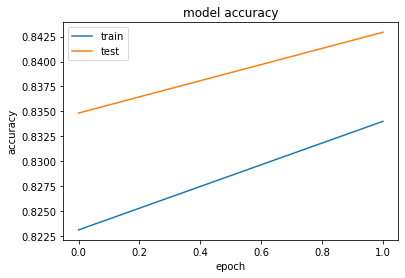



 ************ END lstm ********** 


In [39]:
#epoch_sayisi=int(input("Eposh sayisini giriniz..:"))

print('''
    Uygulanacak algoritmayı seçiniz:
    1 - CNN
    2 - RNN
    3 - LSTM
    ''')

epoch_sayisi=2
for algoritma in ["cnn" ,"rnn", "lstm"]:
    print(f"\n\n ************ Start {algoritma} ********** ")
    #algoritma=input("Seçim:").lower()
    if(algoritma=="cnn"):
        model=cnn(epoch_sayisi)
    elif(algoritma=="rnn"):
        model=rnn(epoch_sayisi)
    elif(algoritma=="lstm"):
        model=lstm(epoch_sayisi)
    print(f"\n\n ************ END {algoritma} ********** ")

